In [54]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Documents\FlipRobo\Capstone\df.csv')
df.head()

,Address,City,Rental Price,No of Bathrooms,Area,Cupboard,Balcony,Geyser,Fridge,Pet,Parking
0,"Kuvar House , Azad Nagar, Colaba, Mumbai",Mumbai,"1,00,000",1,800,-,No Balcony,-,-,-,20 years
1,"Sethia Grandeur, Siddharth Nagar, Bandra East,...",Mumbai,"85,000",No Balcony,1040,-,Available now,-,-,-,1 Covered and 1 Open Parking
2,"Pebbles Marina Apartments, Juhu Koliwada, Khar...",Mumbai,"1,50,000",No Balcony,1000,-,Available now,-,-,-,2 Open Parking
3,"Lodha Venezia, Krishna Nagar, Parel, Mumbai",Mumbai,"1,50,000",1,1400,-,Available now,-,-,-,2 Covered Parking
4,"Lokhandwala Minerva Mahalaxmi, Royal Western I...",Mumbai,"2,40,000",2,2500,-,3,-,-,-,5 years


In [56]:
df.head()

,Address,City,Rental Price,No of Bathrooms,Area,Cupboard,Balcony,Geyser,Fridge,Pet,Parking
0,"Kuvar House , Azad Nagar, Colaba, Mumbai",Mumbai,"1,00,000",1,800,-,No Balcony,-,-,-,20 years
1,"Sethia Grandeur, Siddharth Nagar, Bandra East,...",Mumbai,"85,000",No Balcony,1040,-,Available now,-,-,-,1 Covered and 1 Open Parking
2,"Pebbles Marina Apartments, Juhu Koliwada, Khar...",Mumbai,"1,50,000",No Balcony,1000,-,Available now,-,-,-,2 Open Parking
3,"Lodha Venezia, Krishna Nagar, Parel, Mumbai",Mumbai,"1,50,000",1,1400,-,Available now,-,-,-,2 Covered Parking
4,"Lokhandwala Minerva Mahalaxmi, Royal Western I...",Mumbai,"2,40,000",2,2500,-,3,-,-,-,5 years


In [57]:
df['Country'] = 'India'

In [58]:
df.shape

(5127, 12)

In [59]:
df.columns

Index(['Address', 'City', 'Rental Price', 'No of Bathrooms', 'Area',
       'Cupboard', 'Balcony', 'Geyser', 'Fridge', 'Pet', 'Parking', 'Country'],
      dtype='object')

In [60]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Paras Tierea, Sector 137, Noida                                      49
Prateek Grand City , Siddharth Vihar, Ghaziabad                      37
Supertech Ecociti, Sector 137, Noida                                 32
Puri Pratham, Sector 84, Faridabad                                   22
Suncity Avenue 76, Sector 76, Gurgaon                                22
                                                                     ..
Dhandeeswar, Dhandeeswaram, Velachery, Chennai                        1
JAK Nagar, Thirumullaivoyal, Chennai                                  1
Sornalaya Marutham Flat, Choolaima Nagar, Thoraipakkam, Chennai       1
KENAAN PROPERTIES, Avadi, Chennai                                     1
Apex The Kremlin, Christian Nagar, Nai Basti Dundahera, Ghaziabad     1
Name: Address, Length: 3378, dtype: int64


Kolkata          630
Noida            392
Mumbai           334
Bangalore        330
New Delhi        330
Navi Mumbai      330
Ghaziabad        330
Hyderabad        

In [61]:
# Values to keep in the 'Parking' column
vals = ['1 Covered Parking', '1 Covered and 1 Open Parking', '1 Open Parking', 'No Parking']

# Replacing values not in desired_values with the mode
df['Parking'] = df['Parking'].apply(lambda x: x if x in vals else df['Parking'].mode()[0])


In [62]:
# Replacing 'No Balcony' with 0 and 'Available now' with 1
df['Balcony'] = df['Balcony'].replace({'No Balcony': 0, 'Available now': 1})

# Removing non-numeric values and convert the column to numeric
df['Balcony'] = pd.to_numeric(df['Balcony'], errors='coerce')

# Filling NaN values with the mode of the column
mode_value = df['Balcony'].mode().iloc[0]
df['Balcony'] = df['Balcony'].fillna(mode_value)

In [63]:
df['Cupboard'] = df['Cupboard'].replace('-', 'Available')
df['Geyser'] = df['Geyser'].replace('-', 'Available')
df['Fridge'] = df['Fridge'].replace('-', 'Available')
df['Pet'] = df['Pet'].replace('-', 'Allowed')

In [64]:
# Removing values without numbers in the 'No of Bathrooms' column
df['No of Bathrooms'] = df['No of Bathrooms'].replace(regex=r'\D+', value=pd.NA)

# Converting the column to numeric
df['No of Bathrooms'] = pd.to_numeric(df['No of Bathrooms'], errors='coerce')

# Filling missing values with the mode
mode_value = df['No of Bathrooms'].mode().iloc[0]
df['No of Bathrooms'].fillna(mode_value, inplace=True)


In [65]:
df.duplicated().sum()

49

In [66]:
# Removing duplicate values
df.drop_duplicates(inplace=True)

In [67]:
df.shape

(5078, 12)

In [68]:
contains_dash = df.applymap(lambda x: '-' in str(x))

for column in contains_dash.columns:
    if contains_dash[column].any():
        mode_value = df[column].mode().iloc[0]  
        df[column] = df[column].replace('-', mode_value)

In [69]:
df['Address'] = df['Address'].replace('-', df['Address'].mode().iloc[0])


In [70]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Paras Tierea, Sector 137, Noida                                      45
Supertech Ecociti, Sector 137, Noida                                 32
Prateek Grand City , Siddharth Vihar, Ghaziabad                      32
Suncity Avenue 76, Sector 76, Gurgaon                                22
Logix Blossom County, Logix Blossom County, Sector 137, Noida        22
                                                                     ..
JAK Nagar, Thirumullaivoyal, Chennai                                  1
Sornalaya Marutham Flat, Choolaima Nagar, Thoraipakkam, Chennai       1
KENAAN PROPERTIES, Avadi, Chennai                                     1
Abhimanyu Homes, Kanathur Reddikuppam, Chennai                        1
Apex The Kremlin, Christian Nagar, Nai Basti Dundahera, Ghaziabad     1
Name: Address, Length: 3378, dtype: int64


Kolkata          630
Noida            386
Mumbai           331
Bangalore        330
Navi Mumbai      330
New Delhi        329
Ahmedabad        328
Pune             

In [71]:
df.head()

,Address,City,Rental Price,No of Bathrooms,Area,Cupboard,Balcony,Geyser,Fridge,Pet,Parking,Country
0,"Kuvar House , Azad Nagar, Colaba, Mumbai",Mumbai,"1,00,000",1.0,800,Available,0.0,Available,Available,Allowed,1 Covered Parking,India
1,"Sethia Grandeur, Siddharth Nagar, Bandra East,...",Mumbai,"85,000",2.0,1040,Available,1.0,Available,Available,Allowed,1 Covered and 1 Open Parking,India
2,"Pebbles Marina Apartments, Juhu Koliwada, Khar...",Mumbai,"1,50,000",2.0,1000,Available,1.0,Available,Available,Allowed,1 Covered Parking,India
3,"Lodha Venezia, Krishna Nagar, Parel, Mumbai",Mumbai,"1,50,000",1.0,1400,Available,1.0,Available,Available,Allowed,1 Covered Parking,India
4,"Lokhandwala Minerva Mahalaxmi, Royal Western I...",Mumbai,"2,40,000",2.0,2500,Available,3.0,Available,Available,Allowed,1 Covered Parking,India


In [72]:
df.dtypes

Address             object
City                object
Rental Price        object
No of Bathrooms    float64
Area                 int64
Cupboard            object
Balcony            float64
Geyser              object
Fridge              object
Pet                 object
Parking             object
Country             object
dtype: object

In [73]:
# Converting No of Bathrooms to int
df['No of Bathrooms'] = df['No of Bathrooms'].astype(int)

# Converting Rental Price to int
df['Rental Price'] = df['Rental Price'].str.replace(',', '').astype(int)

# Converting Area to float
df['Area'] = df['Area'].astype(float)

# Converting Balcony to int
df['Balcony'] = df['Balcony'].astype(int)

# Verifying the data types after conversion
print(df.dtypes)


Address             object
City                object
Rental Price         int32
No of Bathrooms      int32
Area               float64
Cupboard            object
Balcony              int32
Geyser              object
Fridge              object
Pet                 object
Parking             object
Country             object
dtype: object


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5078 entries, 0 to 5126
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          5078 non-null   object 
 1   City             5078 non-null   object 
 2   Rental Price     5078 non-null   int32  
 3   No of Bathrooms  5078 non-null   int32  
 4   Area             5078 non-null   float64
 5   Cupboard         5078 non-null   object 
 6   Balcony          5078 non-null   int32  
 7   Geyser           5078 non-null   object 
 8   Fridge           5078 non-null   object 
 9   Pet              5078 non-null   object 
 10  Parking          5078 non-null   object 
 11  Country          5078 non-null   object 
dtypes: float64(1), int32(3), object(8)
memory usage: 456.2+ KB


There are no null values present and data types of all the columns are correct.

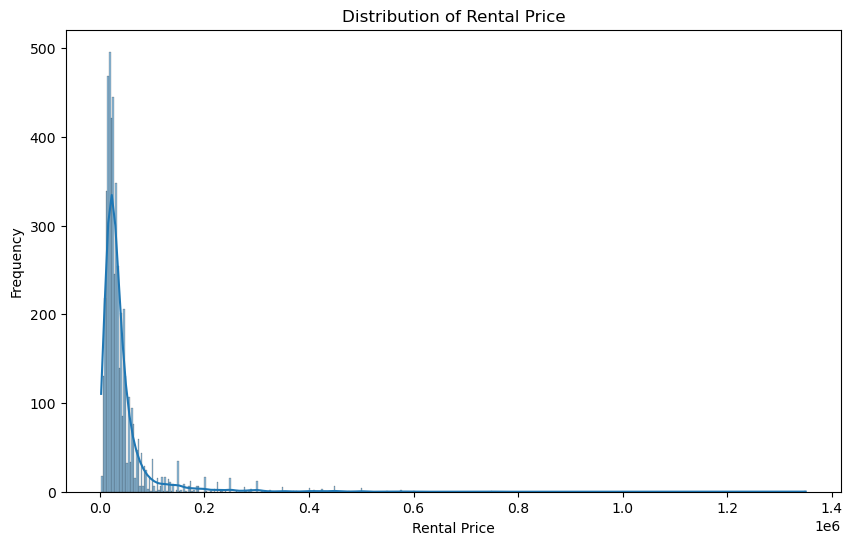

In [75]:
# Visualizing the distribution of rental price
plt.figure(figsize=(10, 6))
sns.histplot(df['Rental Price'], kde=True)
plt.title('Distribution of Rental Price')
plt.xlabel('Rental Price')
plt.ylabel('Frequency')
plt.show()

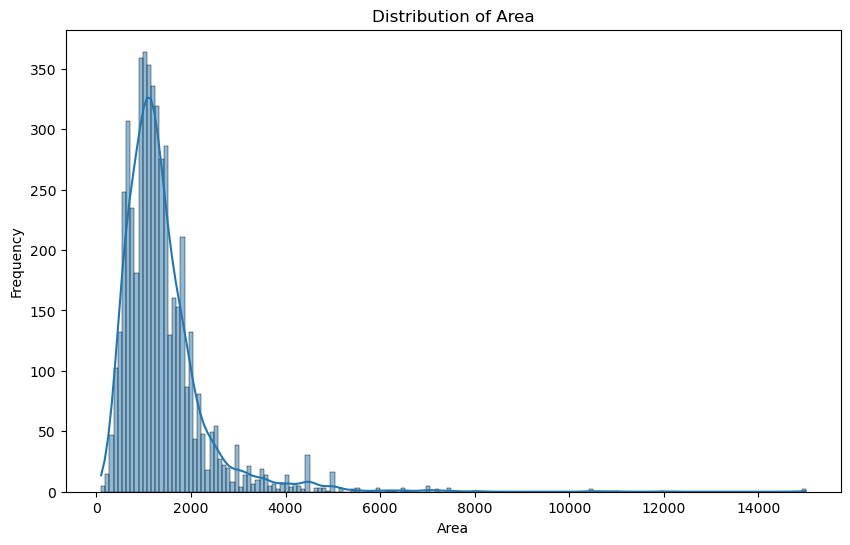

In [76]:
# Visualizing the distribution of area
plt.figure(figsize=(10, 6))
sns.histplot(df['Area'], kde=True)
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

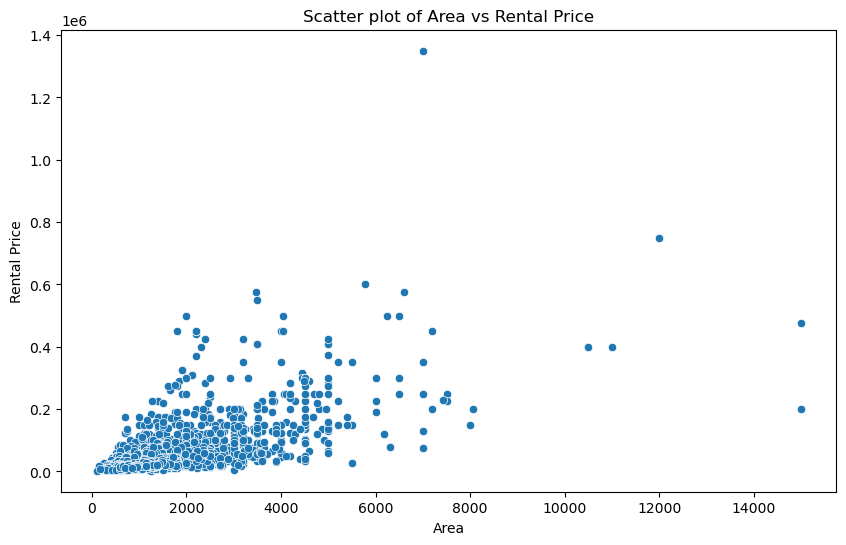

In [77]:
# Scatter plot between Rental Price and Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Rental Price', data=df)
plt.title('Scatter plot of Area vs Rental Price')
plt.xlabel('Area')
plt.ylabel('Rental Price')
plt.show()

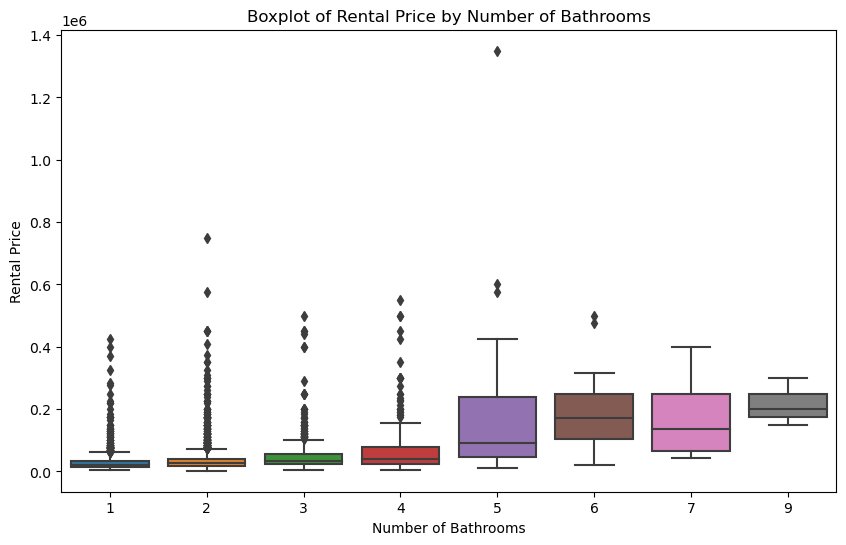

In [78]:
# Boxplot of Rental Price by number of bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='No of Bathrooms', y='Rental Price', data=df)
plt.title('Boxplot of Rental Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Rental Price')
plt.show()

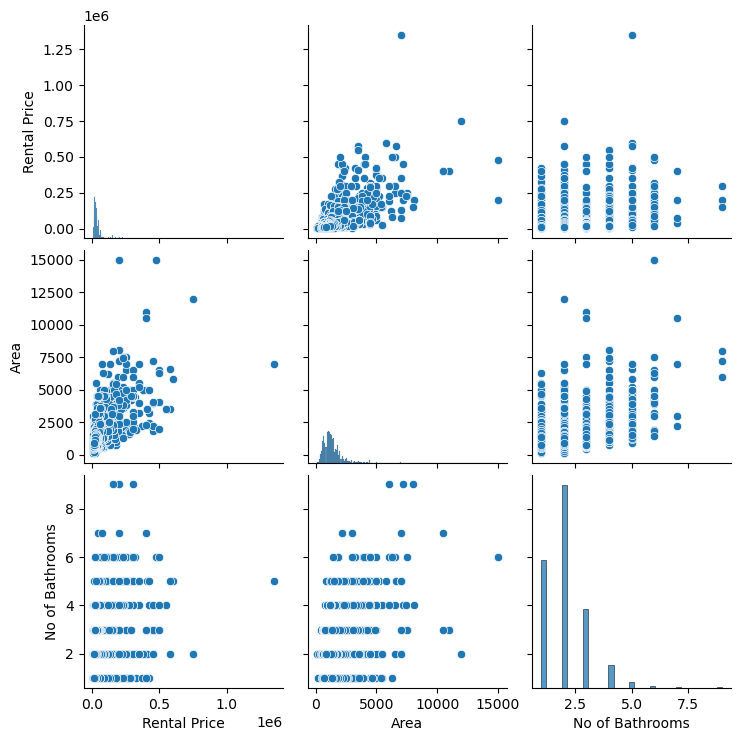

In [79]:
# Pairplot of numerical variables
sns.pairplot(df[['Rental Price', 'Area', 'No of Bathrooms']])
plt.show()

In [80]:
df.describe()

,Rental Price,No of Bathrooms,Area,Balcony
count,5.078000e+03,5078.000000,5078.000000,5078.000000
mean,4.129504e+04,2.059472,1397.369831,1.320796
std,5.460414e+04,0.952903,928.642942,0.824629
min,2.400000e+03,1.000000,100.000000,0.000000
25%,1.800000e+04,1.000000,890.000000,1.000000
50%,2.700000e+04,2.000000,1200.000000,1.000000
75%,4.407500e+04,3.000000,1650.000000,1.000000
max,1.350000e+06,9.000000,15000.000000,7.000000


In [81]:
num_cols = df.select_dtypes(exclude=['object']).columns
num_cols

Index(['Rental Price', 'No of Bathrooms', 'Area', 'Balcony'], dtype='object')

In [82]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Address', 'City', 'Cupboard', 'Geyser', 'Fridge', 'Pet', 'Parking',
       'Country'],
      dtype='object')

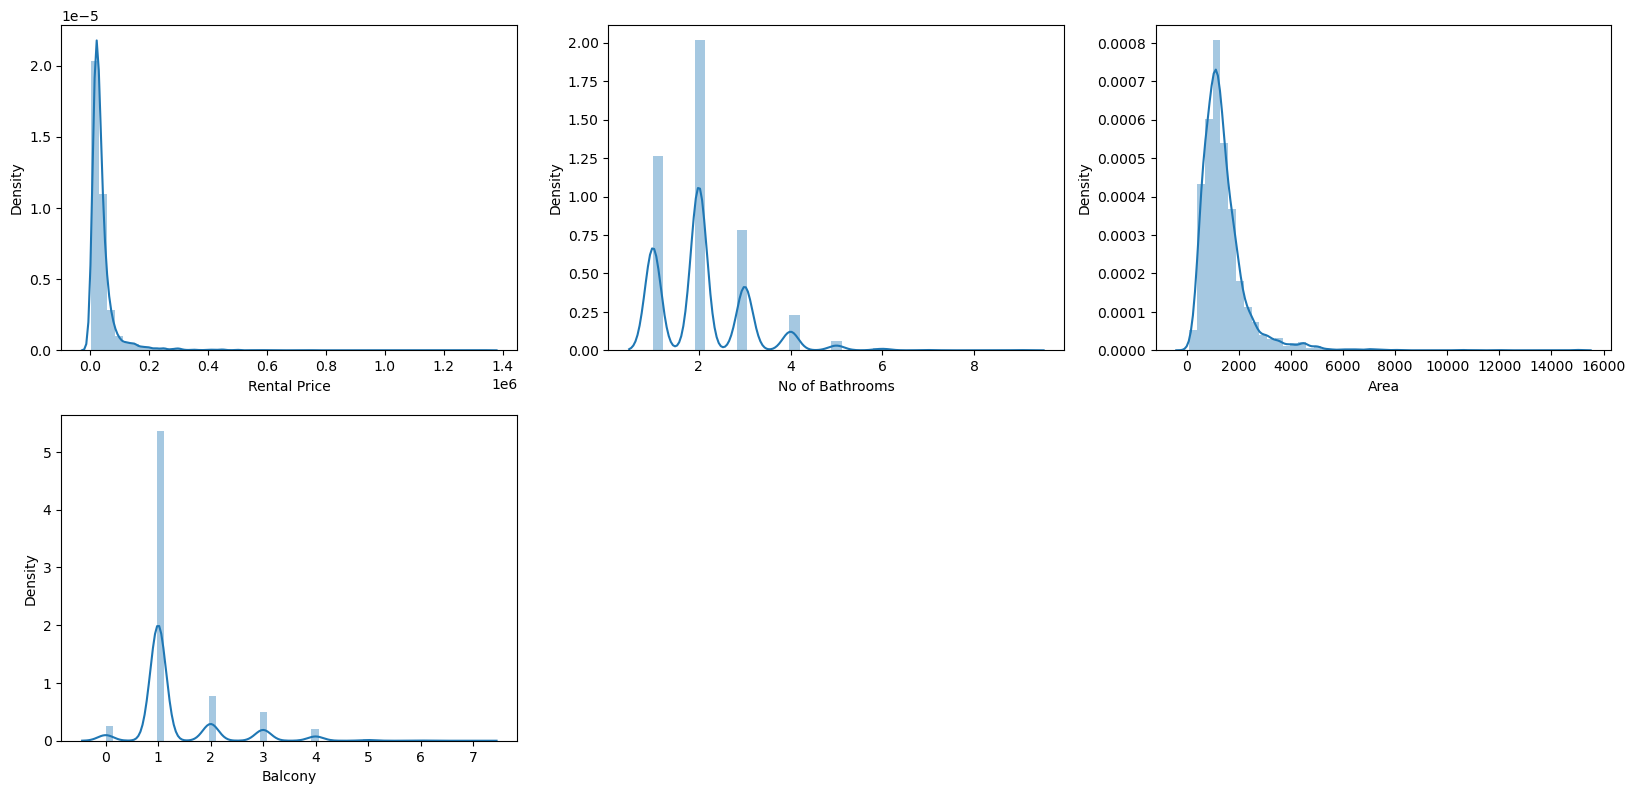

In [83]:
# checking how data is distributed in numerical columns
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for i in num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

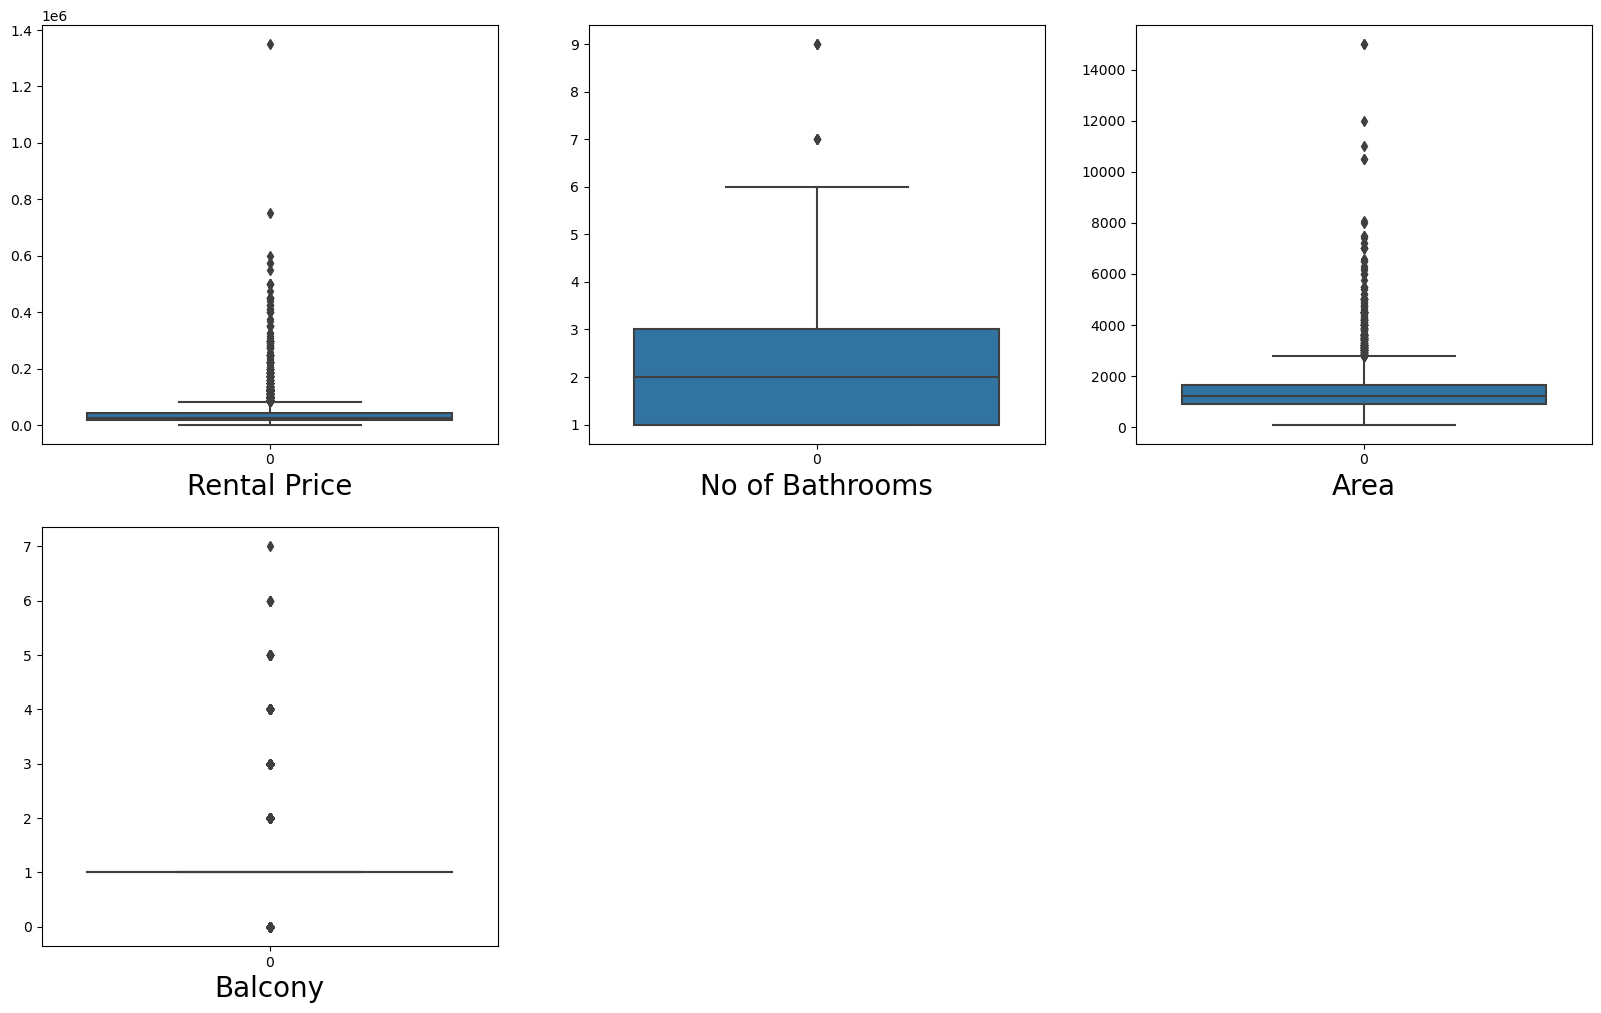

In [84]:
# Visualizing the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in num_cols:
    if graph<=13: 
        plt.subplot (4,3,graph) 
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
    
    graph+=1
plt.show()

We will not remove outliers here as Rental price and Area are our taget columns. and in other two 'No of Bathrooms' and 'Balcony' all values are practically possible. 
so we will move ahead and check for skewness.

In [85]:
df['Balcony'].unique()

array([0, 1, 3, 2, 4, 5, 7, 6])

In [86]:
df['No of Bathrooms'].unique()

array([1, 2, 4, 3, 5, 7, 6, 9])

In [90]:
df1 = df.copy()

In [91]:
df1.skew()

Rental Price       7.020014
No of Bathrooms    1.236663
Area               4.040203
Balcony            2.088936
dtype: float64

There is skewness present in the columns Rental Price, Area, No of Bathrooms and Balcony. we need not remove skewness from Rental Price and Area as they are target variables.We will try to remove skewness from the other 2.

In [92]:
skewed_columns = ['Balcony','No of Bathrooms']

for column in skewed_columns:
    df1[column] = np.cbrt(df1[column])

In [93]:
df.skew()

Rental Price       7.020014
No of Bathrooms    1.236663
Area               4.040203
Balcony            2.088936
dtype: float64

In [94]:
skewed_columns = ['Balcony','No of Bathrooms']

for column in skewed_columns:
    df1[column] = np.sqrt(df1[column])

In [96]:
df1.skew()

Rental Price       7.020014
No of Bathrooms    0.130043
Area               4.040203
Balcony           -3.884197
dtype: float64

In [97]:
df1['Balcony'] = np.exp(df1['Balcony'])

In [98]:
df1.skew()

Rental Price       7.020014
No of Bathrooms    0.130043
Area               4.040203
Balcony           -2.413170
dtype: float64

In [99]:
df1['Balcony'] = np.log1p(df1['Balcony'])

In [100]:
df1.skew()

Rental Price       7.020014
No of Bathrooms    0.130043
Area               4.040203
Balcony           -3.484645
dtype: float64

In [101]:
from scipy.stats import yeojohnson

# Applying Yeo-Johnson transformation
df1['Balcony'], _ = yeojohnson(df1['Balcony'] + 1)


In [102]:
df1.skew()

Rental Price       7.020014
No of Bathrooms    0.130043
Area               4.040203
Balcony            0.416560
dtype: float64

In [128]:
df2 = df1.copy()

In [129]:
columns_to_drop = ['Cupboard', 'Pet', 'Fridge', 'Country', 'Geyser']
df2.drop(columns=columns_to_drop, inplace=True)

We have removed skewness succesfully. Now we will move ahead and encode the data.

In [130]:
# Encoding categorical columns using OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder 
OE = OrdinalEncoder()
for i in df2.columns:
    if df2[i].dtypes == 'object':
        df2[i] = OE.fit_transform (df2[i].values.reshape(-1, 1))
df2

,Address,City,Rental Price,No of Bathrooms,Area,Balcony,Parking
0,1394.0,9.0,100000,1.000000,800.0,15377.445066,0.0
1,2647.0,9.0,85000,1.122462,1040.0,195128.847473,1.0
2,2008.0,9.0,150000,1.122462,1000.0,195128.847473,0.0
3,1473.0,9.0,150000,1.000000,1400.0,195128.847473,0.0
4,1487.0,9.0,240000,1.122462,2500.0,336692.991686,0.0
...,...,...,...,...,...,...,...
5122,3279.0,4.0,22000,1.122462,1300.0,195128.847473,1.0
5123,2525.0,4.0,12400,1.000000,700.0,195128.847473,2.0
5124,2066.0,4.0,20000,1.200937,1380.0,195128.847473,0.0
5125,250.0,4.0,17000,1.259921,1150.0,195128.847473,1.0


In [131]:
cor=df2.corr()
cor

,Address,City,Rental Price,No of Bathrooms,Area,Balcony,Parking
Address,1.000000,-0.038139,-0.035087,-0.074345,-0.030551,-0.066107,0.016593
City,-0.038139,1.000000,0.021100,0.020700,-0.168085,-0.038654,0.100352
Rental Price,-0.035087,0.021100,1.000000,0.265102,0.648987,0.142345,-0.148224
No of Bathrooms,-0.074345,0.020700,0.265102,1.000000,0.399755,0.312708,-0.175653
Area,-0.030551,-0.168085,0.648987,0.399755,1.000000,0.287940,-0.209668
Balcony,-0.066107,-0.038654,0.142345,0.312708,0.287940,1.000000,-0.168058
Parking,0.016593,0.100352,-0.148224,-0.175653,-0.209668,-0.168058,1.000000


<Axes: >

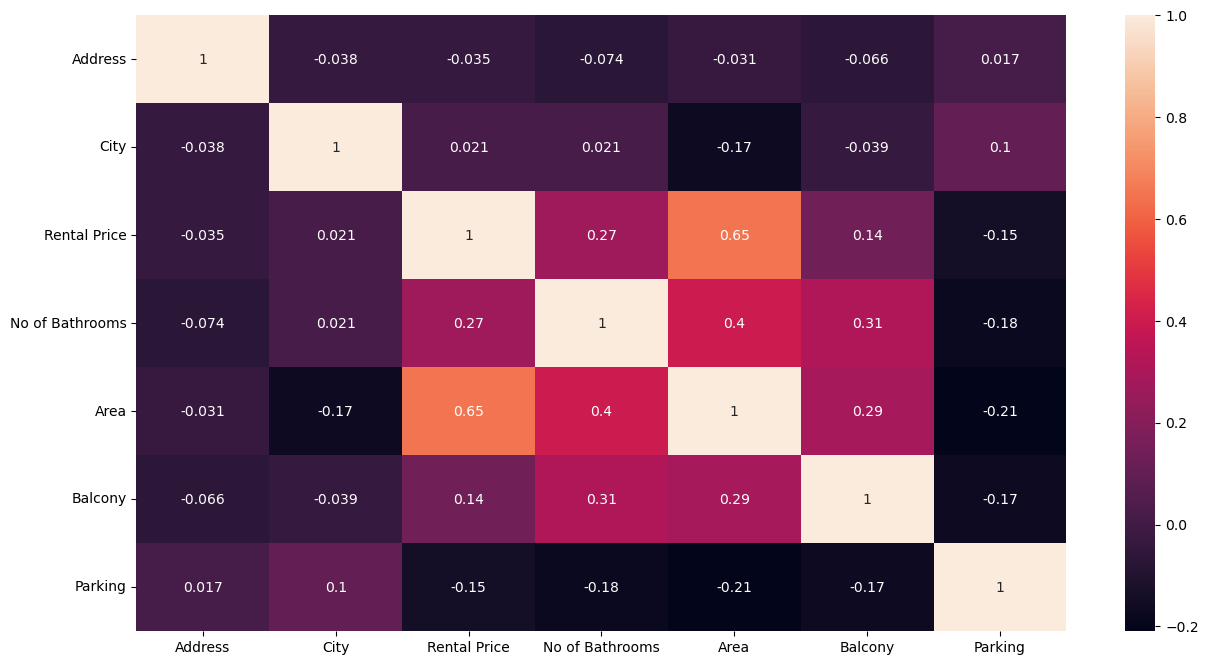

In [132]:
fig= plt.figure(figsize=(15,8))
sns.heatmap(cor,annot = True)

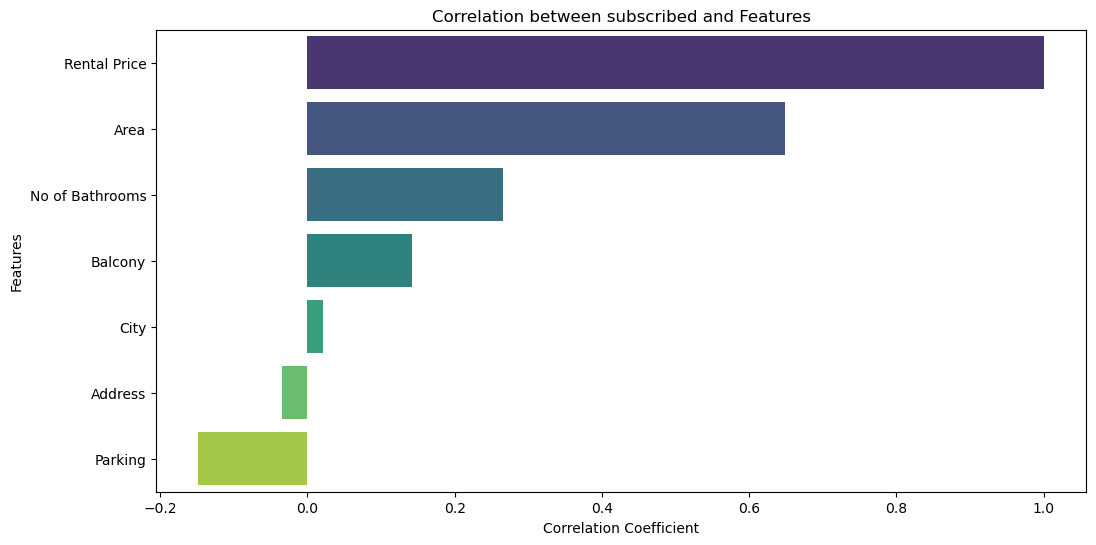

In [133]:
correlation_with_target = df2.corr()['Rental Price'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title(f'Correlation between subscribed and Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

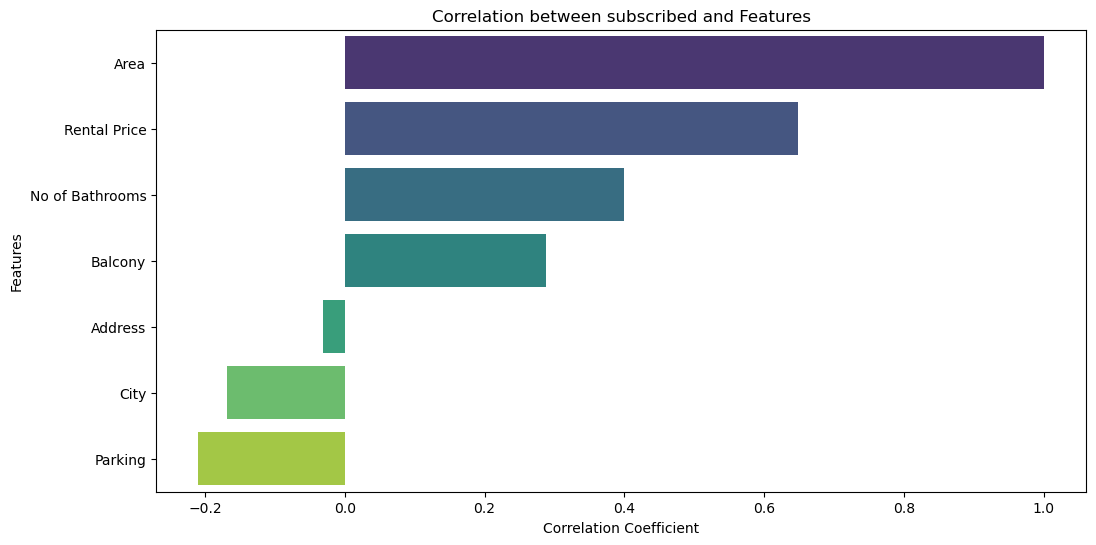

In [134]:
correlation_with_target = df2.corr()['Area'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title(f'Correlation between subscribed and Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [135]:
# Splitting dataset into features and target variables
x1 = df2.drop(["Rental Price"], axis=1)
y1 = df2["Rental Price"]

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1= pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)
x1

,Address,City,No of Bathrooms,Area,Balcony,Parking
0,-0.303224,0.438425,-1.331033,-0.643335,-2.995151,-0.556175
1,0.992996,0.438425,0.122606,-0.384868,-0.284820,0.598941
2,0.331955,0.438425,0.122606,-0.427946,-0.284820,-0.556175
3,-0.221499,0.438425,-1.331033,0.002833,-0.284820,-0.556175
4,-0.207017,0.438425,0.122606,1.187473,1.849715,-0.556175
...,...,...,...,...,...,...
5073,1.646797,-0.743275,0.122606,-0.104862,-0.284820,0.598941
5074,0.866788,-0.743275,-1.331033,-0.751030,-0.284820,1.754057
5075,0.391955,-0.743275,1.054112,-0.018706,-0.284820,-0.556175
5076,-1.486685,-0.743275,1.754261,-0.266404,-0.284820,0.598941


In [137]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x1.columns
vif_data["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]

print(vif_data)

          Variable       VIF
0          Address  1.009156
1             City  1.046864
2  No of Bathrooms  1.278691
3             Area  1.296513
4          Balcony  1.161518
5          Parking  1.073134


There is no multicollinearity exists.

In [138]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [139]:
best_RS = None
max_acc = 0
for random_state in range(1, 101): 
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)

    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    accuracy = r2_score(y_test, predictions)

    if accuracy > max_acc:
        max_acc = accuracy
        best_RS = random_state

print(f'Best Random State: {best_RS}')
print(f'Maximum Accuracy: {max_acc}')

Best Random State: 80
Maximum Accuracy: 0.5674537740260067


In [140]:
x_train,x_test,y_train,y_test = train_test_split(x1, y1, test_size = 0.30, random_state =best_RS)

In [141]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN 
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

Results for LinearRegression:
R2_score:  0.542461976512119
R2_score on training Data: 40.26943129438708
Mean Absolute Error:- 19810.720217705773
Mean Squared Error:- 1263999441.4295294
Root Mean Squared Error:- 35552.76981375051
Cross-validation scores: [ 0.25341425  0.50434135  0.24092972  0.38882498 -0.62887375]
Mean Cross-validation score: 0.15172730850524876
Difference between R2 score and cross-validation score is 39.07346680068703


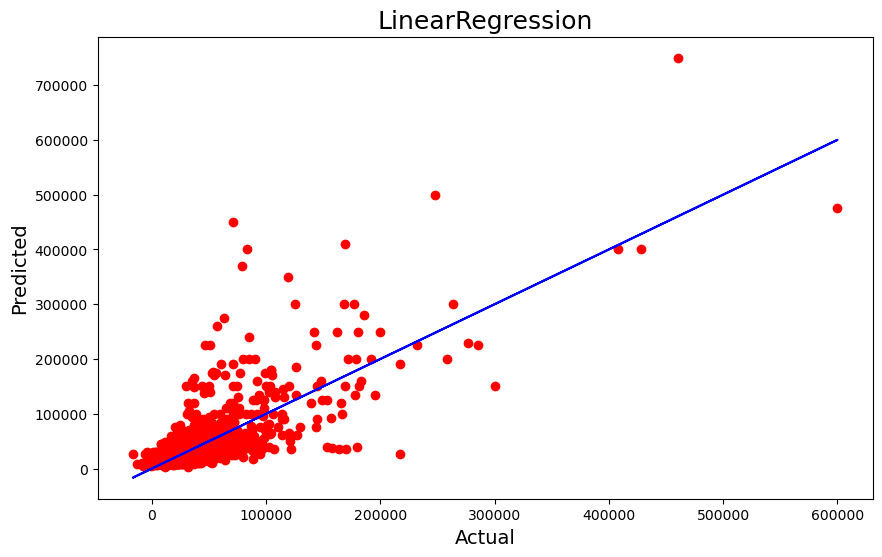



Results for RandomForestRegressor:
R2_score:  0.6304318852845057
R2_score on training Data: 93.53658575919567
Mean Absolute Error:- 13811.570739727846
Mean Squared Error:- 1020972829.7760206
Root Mean Squared Error:- 31952.66545651584
Cross-validation scores: [ 0.25123476  0.51562124 -0.10920391  0.13962791 -0.70783979]
Mean Cross-validation score: 0.01788804216474933
Difference between R2 score and cross-validation score is 61.25438431197563


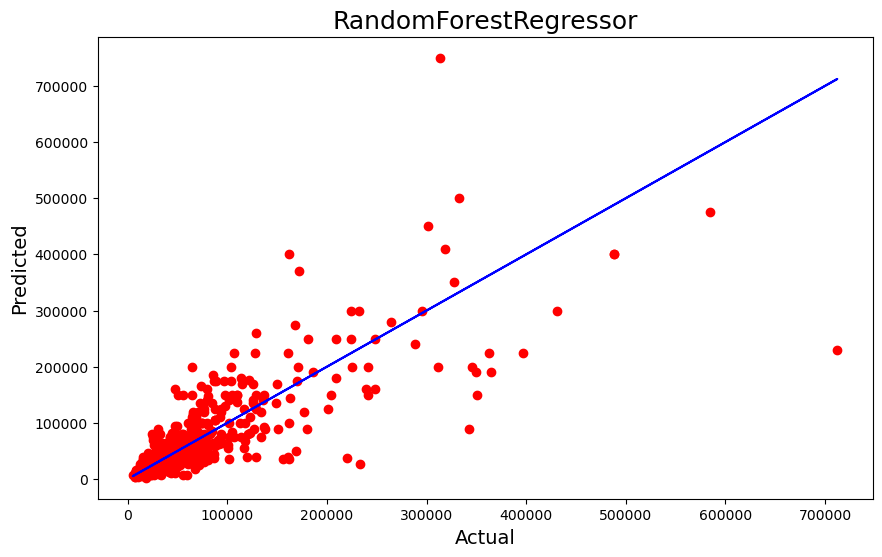



Results for DecisionTreeRegressor:
R2_score:  0.09080256149395927
R2_score on training Data: 99.98718358842169
Mean Absolute Error:- 18653.228696412945
Mean Squared Error:- 2511758576.1727076
Root Mean Squared Error:- 50117.447821818576
Cross-validation scores: [ 0.02840028  0.27469441 -1.91226717 -0.67897745 -1.3221031 ]
Mean Cross-validation score: -0.7220506077223794
Difference between R2 score and cross-validation score is 81.28531692163386


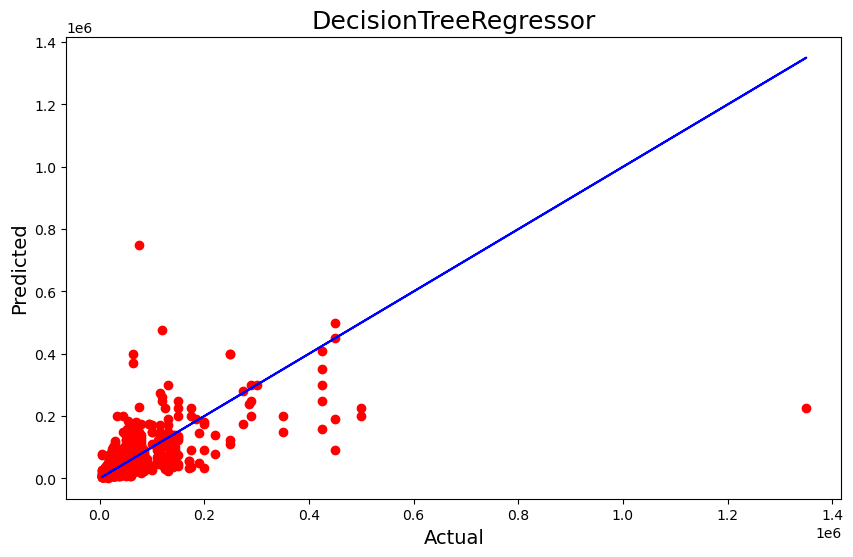



Results for KNeighborsRegressor:
R2_score:  0.47340040152575047
R2_score on training Data: 61.63447728055769
Mean Absolute Error:- 17747.46811023622
Mean Squared Error:- 1454789687.760446
Root Mean Squared Error:- 38141.70535988717
Cross-validation scores: [ 0.25017636  0.49184063  0.01806923  0.13441724 -2.17181181]
Mean Cross-validation score: -0.2554616684456953
Difference between R2 score and cross-validation score is 72.88620699714457


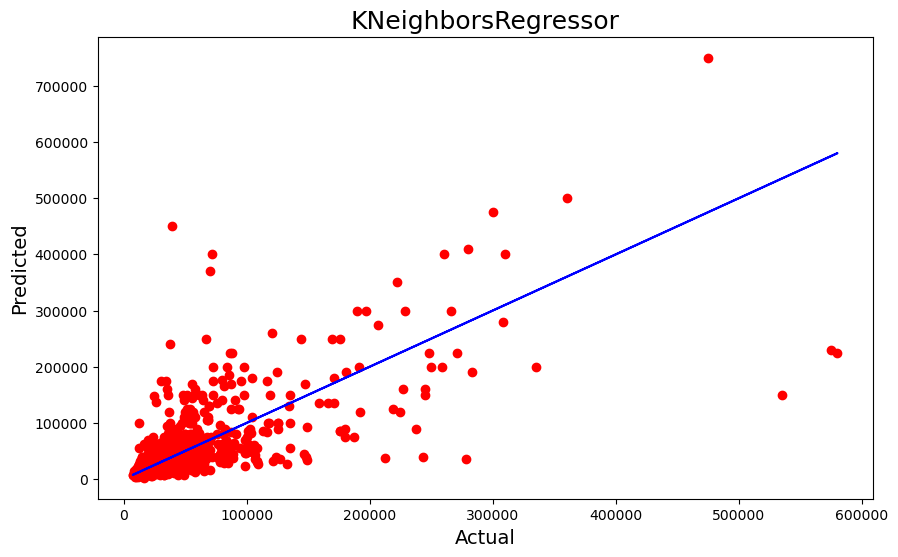



Results for Lasso:
R2_score:  0.5424658234663144
R2_score on training Data: 40.269431003826206
Mean Absolute Error:- 19810.302976120074
Mean Squared Error:- 1263988813.7926893
Root Mean Squared Error:- 35552.62035058301
Cross-validation scores: [ 0.25340201  0.50434455  0.24097584  0.38885496 -0.62887948]
Mean Cross-validation score: 0.1517395779873867
Difference between R2 score and cross-validation score is 39.07262454789277


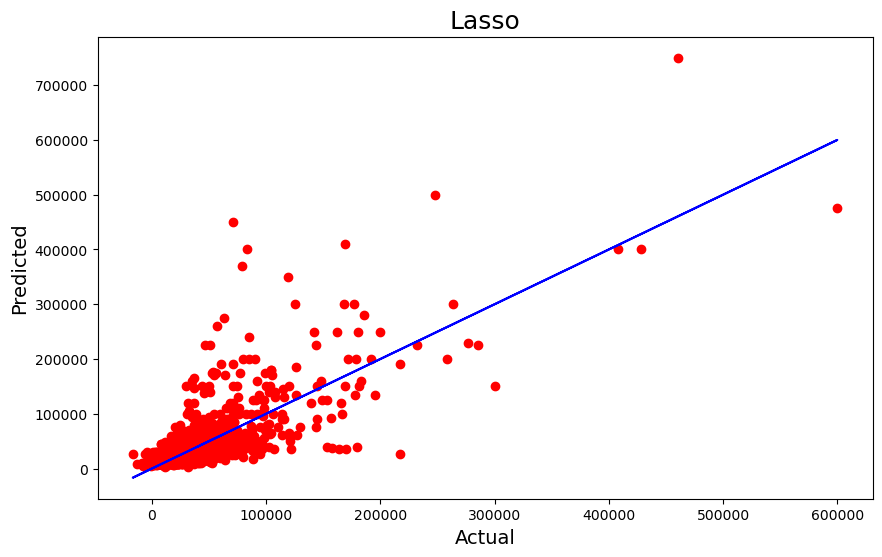



Results for Ridge:
R2_score:  0.5424863181868554
R2_score on training Data: 40.269425292760495
Mean Absolute Error:- 19808.54794148475
Mean Squared Error:- 1263932194.8583362
Root Mean Squared Error:- 35551.82407216733
Cross-validation scores: [ 0.25336841  0.50430967  0.24110066  0.38895193 -0.62869792]
Mean Cross-validation score: 0.15180654983701966
Difference between R2 score and cross-validation score is 39.067976834983575


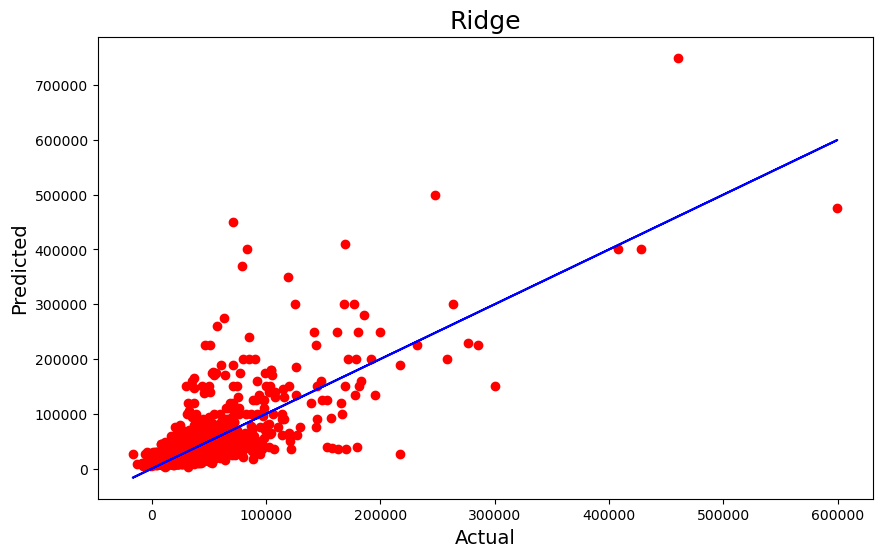

In [142]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNN(),
    Lasso(),
    Ridge()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fitting the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train) * 100
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Cross-validation
    score = cross_val_score(model, x1, y1, cv=5, scoring="r2")
    
    # Print results
    print(f"Results for {model_name}:")
    print('R2_score: ', r2_test)
    print('R2_score on training Data:', r2_train)
    print('Mean Absolute Error:-', mae)
    print('Mean Squared Error:-', mse)
    print("Root Mean Squared Error:-", rmse)
    
     # Cross-validation scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between R2 score and cross-validation score is", (r2_test - score.mean()) * 100)
    
    
    #plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(x=y_pred, y=y_test, color='r')
    plt.plot(y_pred, y_pred, color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(model_name, fontsize=18)
    plt.show()
    
    print("\n" + "="*40 + "\n")

The Random Forest Regressor appears to be the best model among the ones evaluated. It exhibits the highest R-squared score (0.63) and lowest mean absolute error, indicating superior predictive performance compared to other models. Additionally, it shows the highest R-squared score on the training data, suggesting better generalization.

#### Hyper Parameter tunning

In [143]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [144]:
# Initializing GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), params, cv=5, scoring='accuracy')


In [145]:
# Fittng the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [146]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [147]:
best_model = grid_search.best_estimator_

# Making predictions on the test set using the best model
pred = best_model.predict(x_test)

print("R2_score: ",r2_score (y_test, pred))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred)) 
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-", np.sqrt(mean_squared_error(y_test, pred)))


R2_score:  0.6594421139905042
Mean Absolute Error:- 13777.128503769416
Mean Squared Error:- 940828861.4111784
Root Mean Squared Error:- 30672.93369423894


In [148]:
import joblib
joblib.dump(best_model, "Rental Price.pkl")

['Rental Price.pkl']

In [149]:
# loading the saved model and getting the predictions
model=joblib.load("Rental Price.pkl")

# Prediction
prediction = best_model.predict(x_test)
prediction

array([40860.02      , 15676.22      , 25247.46666667, ...,
       31060.        , 35640.        , 22740.        ])

In [150]:
a = np.array(y_test)
df3 = pd.DataFrame()
df3["Predicted"] = prediction
df3["Original"] = a
df3

,Predicted,Original
0,40860.020000,28000
1,15676.220000,15500
2,25247.466667,9000
3,10918.000000,9500
4,29540.000000,16000
...,...,...
1519,31260.000000,40000
1520,30146.000000,24000
1521,31060.000000,43000
1522,35640.000000,35000


Now we will move ahead and make prediction for 'Area'.

In [151]:
# Splitting dataset into features and target variables
x2 = df2.drop(["Area"], axis=1)
y2 = df2["Area"]

In [152]:
scaler = StandardScaler()
x2= pd.DataFrame(scaler.fit_transform(x2), columns = x2.columns)
x2

,Address,City,Rental Price,No of Bathrooms,Balcony,Parking
0,-0.303224,0.438425,1.075207,-1.331033,-2.995151,-0.556175
1,0.992996,0.438425,0.800475,0.122606,-0.284820,0.598941
2,0.331955,0.438425,1.990978,0.122606,-0.284820,-0.556175
3,-0.221499,0.438425,1.990978,-1.331033,-0.284820,-0.556175
4,-0.207017,0.438425,3.639367,0.122606,1.849715,-0.556175
...,...,...,...,...,...,...
5073,1.646797,-0.743275,-0.353397,0.122606,-0.284820,0.598941
5074,0.866788,-0.743275,-0.529225,-1.331033,-0.284820,1.754057
5075,0.391955,-0.743275,-0.390028,1.054112,-0.284820,-0.556175
5076,-1.486685,-0.743275,-0.444974,1.754261,-0.284820,0.598941


In [153]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x2.columns
vif_data["VIF"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]

print(vif_data)

          Variable       VIF
0          Address  1.009306
1             City  1.015384
2     Rental Price  1.092223
3  No of Bathrooms  1.191057
4          Balcony  1.131872
5          Parking  1.069177


No multicollinerity exists here.

In [154]:
best_RS = None
max_acc = 0
for random_state in range(1, 101): 
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=random_state)

    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    accuracy = r2_score(y_test, predictions)

    if accuracy > max_acc:
        max_acc = accuracy
        best_RS = random_state

print(f'Best Random State: {best_RS}')
print(f'Maximum Accuracy: {max_acc}')

Best Random State: 44
Maximum Accuracy: 0.6455140429287671


In [155]:
x_train,x_test,y_train,y_test = train_test_split(x2, y2, test_size = 0.30, random_state =best_RS)

Results for LinearRegression:
R2_score:  0.5506057794640558
R2_score on training Data: 51.19755088934516
Mean Absolute Error:- 410.29780532075546
Mean Squared Error:- 496678.5382757339
Root Mean Squared Error:- 704.7542396294853
Cross-validation scores: [0.2844051  0.59403113 0.47695387 0.41099502 0.38800422]
Mean Cross-validation score: 0.43087786684457663
Difference between R2 score and cross-validation score is 11.972791261947913


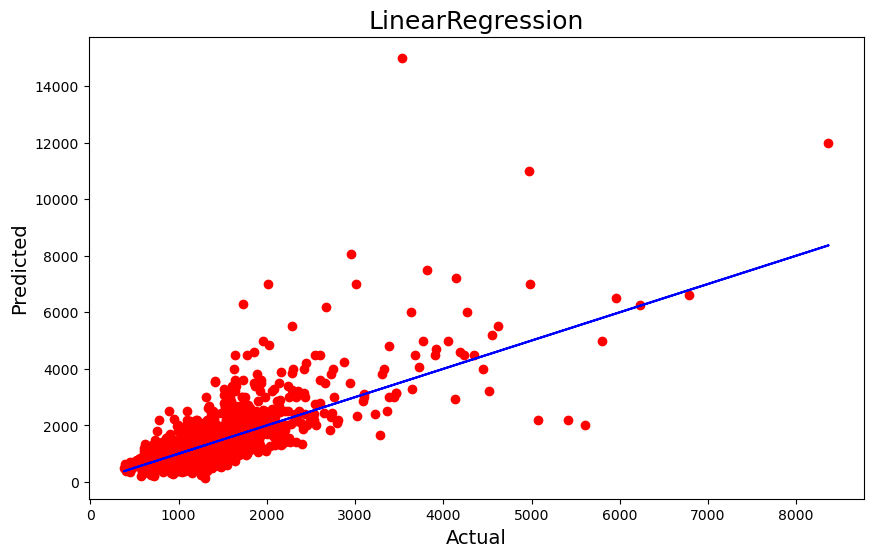



Results for RandomForestRegressor:
R2_score:  0.7017347328457848
R2_score on training Data: 96.10829138949688
Mean Absolute Error:- 307.13640519935007
Mean Squared Error:- 329648.1132576736
Root Mean Squared Error:- 574.149904866032
Cross-validation scores: [0.03896959 0.68109863 0.61098456 0.4042585  0.31844988]
Mean Cross-validation score: 0.4107522306615164
Difference between R2 score and cross-validation score is 29.09825021842684


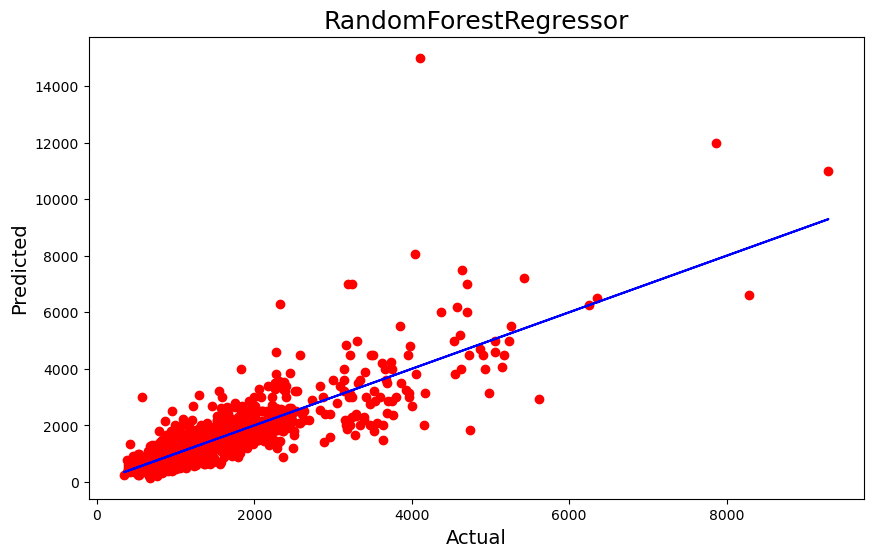



Results for DecisionTreeRegressor:
R2_score:  0.5464081759873952
R2_score on training Data: 99.96631982089653
Mean Absolute Error:- 392.25853018372703
Mean Squared Error:- 501317.8047900263
Root Mean Squared Error:- 708.0379967134718
Cross-validation scores: [-0.40454271  0.40014145  0.22638887  0.19512066  0.05184154]
Mean Cross-validation score: 0.09378995988380152
Difference between R2 score and cross-validation score is 45.26182161035937


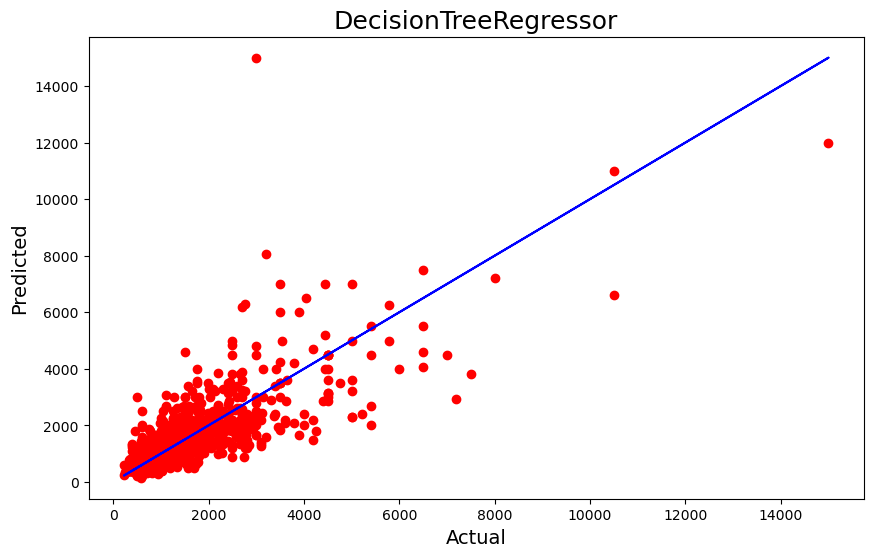



Results for KNeighborsRegressor:
R2_score:  0.5660622920094809
R2_score on training Data: 73.15812789161693
Mean Absolute Error:- 379.0196850393701
Mean Squared Error:- 479595.7238845144
Root Mean Squared Error:- 692.5285004131703
Cross-validation scores: [0.23825711 0.55551937 0.51126079 0.31547941 0.23290511]
Mean Cross-validation score: 0.37068435877045675
Difference between R2 score and cross-validation score is 19.537793323902413


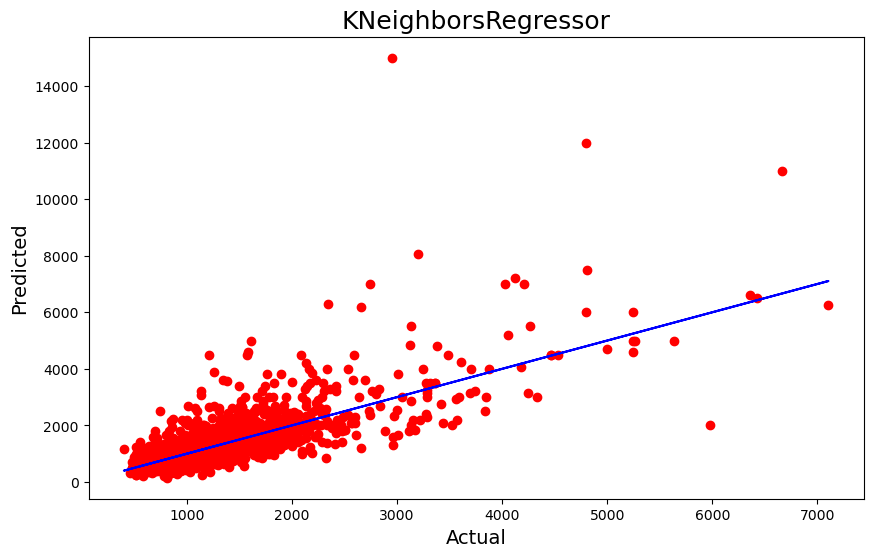



Results for Lasso:
R2_score:  0.5502830383951882
R2_score on training Data: 51.19694145965112
Mean Absolute Error:- 410.26290901768107
Mean Squared Error:- 497035.23748324823
Root Mean Squared Error:- 705.0072605890299
Cross-validation scores: [0.28573485 0.5939808  0.47696573 0.41081517 0.38822307]
Mean Cross-validation score: 0.4311439245028329
Difference between R2 score and cross-validation score is 11.913911389235532


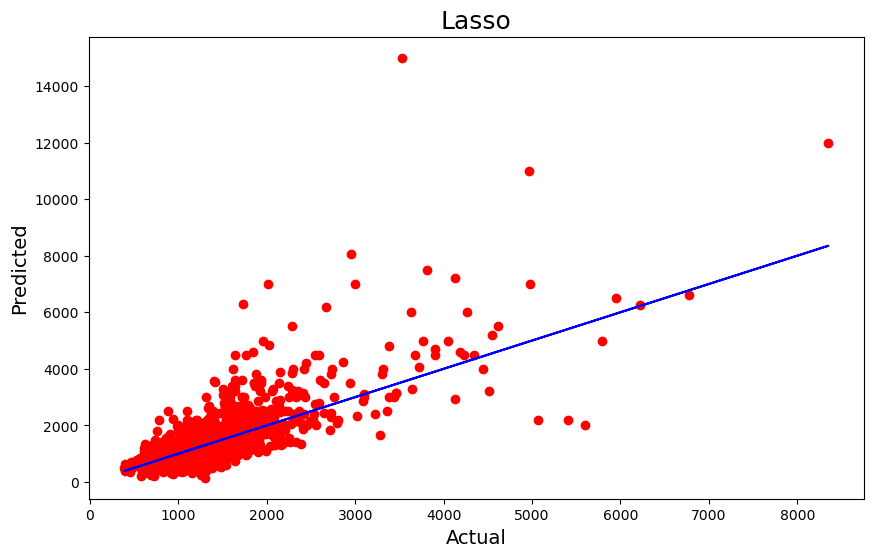



Results for Ridge:
R2_score:  0.5505672348144661
R2_score on training Data: 51.19754789961857
Mean Absolute Error:- 410.30772732216207
Mean Squared Error:- 496721.1385125454
Root Mean Squared Error:- 704.7844624511422
Cross-validation scores: [0.28471552 0.59401274 0.47692724 0.41099639 0.38797665]
Mean Cross-validation score: 0.430925709090259
Difference between R2 score and cross-validation score is 11.96415257242071


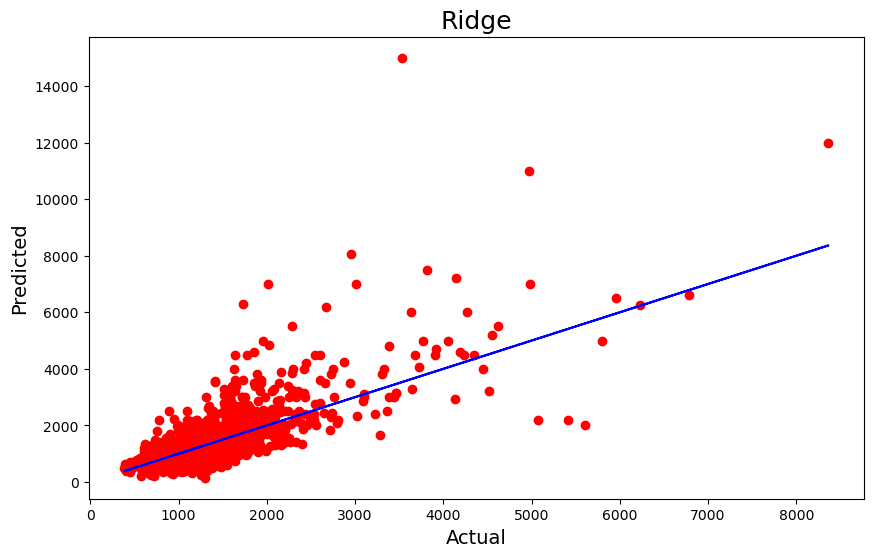

In [156]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNN(),
    Lasso(),
    Ridge()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fitting the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train) * 100
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Cross-validation
    score = cross_val_score(model, x2, y2, cv=5, scoring="r2")
    
    # Print results
    print(f"Results for {model_name}:")
    print('R2_score: ', r2_test)
    print('R2_score on training Data:', r2_train)
    print('Mean Absolute Error:-', mae)
    print('Mean Squared Error:-', mse)
    print("Root Mean Squared Error:-", rmse)
    
     # Cross-validation scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between R2 score and cross-validation score is", (r2_test - score.mean()) * 100)
    
    
    #plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(x=y_pred, y=y_test, color='r')
    plt.plot(y_pred, y_pred, color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(model_name, fontsize=18)
    plt.show()
    
    print("\n" + "="*40 + "\n")

The RandomForestRegressor is the best model among all the models. It achieves the highest R-squared score (0.70) on the testing data, indicating a better fit to the data compared to other models. Additionally, it has the lowest mean absolute error and mean squared error, demonstrating better predictive performance.

#### Hyper parameter tunning

In [157]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [158]:
# Initializing GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), params, cv=5, scoring='accuracy')

In [159]:
# Fittng the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [160]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [161]:
best_model = grid_search.best_estimator_

# Making predictions on the test set using the best model
pred = best_model.predict(x_test)

print("R2_score: ",r2_score (y_test, pred))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred)) 
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-", np.sqrt(mean_squared_error(y_test, pred)))


R2_score:  0.6905657678725546
Mean Absolute Error:- 311.2329433195851
Mean Squared Error:- 341992.2533099
Root Mean Squared Error:- 584.8010373707455


In [162]:
joblib.dump(best_model, "Area.pkl")

['Area.pkl']

In [163]:
# loading the saved model and getting the predictions
model=joblib.load("Area.pkl")

# Prediction
prediction = best_model.predict(x_test)
prediction

array([1356.08,  543.28,  676.26, ...,  671.62,  802.84,  468.8 ])

In [164]:
a = np.array(y_test)
df4 = pd.DataFrame()
df4["Predicted"] = prediction
df4["Original"] = a
df4

,Predicted,Original
0,1356.08,1150.0
1,543.28,600.0
2,676.26,500.0
3,684.22,465.0
4,1587.80,1700.0
...,...,...
1519,751.16,950.0
1520,3133.96,3600.0
1521,671.62,600.0
1522,802.84,850.0
